In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Exploratory Analysis of Animation Studio Dataset**


In [2]:
df = pd.read_csv("/Users/michaelburch/Desktop/EPFL/Data_Visualization/Project/MoscowMickeyMule/data/Animation_Movies.csv")

In [3]:
df.head(1)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English


In [4]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [5]:
len(df)

51945

In [ ]:
df.shape

(51945, 23)

In [11]:
df["popularity"]

0        107.292
1         90.968
2         55.456
3        166.578
4         58.517
          ...   
51940      0.600
51941      2.531
51942      1.952
51943      0.600
51944      0.600
Name: popularity, Length: 51945, dtype: float64

In [9]:
df_2 = df[["title","vote_average","release_date","revenue","runtime","budget","genres"]]

In [10]:
df_2.head()

,title,vote_average,release_date,revenue,runtime,budget,genres
0,Inside Out,7.922,2015-06-09,857611174,95,175000000,"Animation, Family, Adventure, Drama, Comedy"
1,Up,7.949,2009-05-28,735099082,96,175000000,"Animation, Comedy, Family, Adventure"
2,Finding Nemo,7.824,2003-05-30,940335536,100,94000000,"Animation, Family"
3,Coco,8.222,2017-10-27,800526015,105,175000000,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,WALL·E,8.078,2008-06-22,521311860,98,180000000,"Animation, Family, Science Fiction"


In [12]:
df_2.shape

(51945, 7)

In [13]:
df_3 = df_2.dropna()

In [14]:
df_3.shape

(49807, 7)

In [15]:
df_3.head()

,title,vote_average,release_date,revenue,runtime,budget,genres
0,Inside Out,7.922,2015-06-09,857611174,95,175000000,"Animation, Family, Adventure, Drama, Comedy"
1,Up,7.949,2009-05-28,735099082,96,175000000,"Animation, Comedy, Family, Adventure"
2,Finding Nemo,7.824,2003-05-30,940335536,100,94000000,"Animation, Family"
3,Coco,8.222,2017-10-27,800526015,105,175000000,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,WALL·E,8.078,2008-06-22,521311860,98,180000000,"Animation, Family, Science Fiction"


In [16]:
# Save the dataset as csv
df_3.to_csv('/Users/michaelburch/Desktop/EPFL/Data_Visualization/Project/MoscowMickeyMule/movieComparer/movieComparer_df.csv', index=False)

**Basic Statistics**


In [11]:
print("Basic Statistics:")
print(df.describe(include='all'))

Basic Statistics:
                  id                   title  vote_average    vote_count  \
count   5.194500e+04                   51944  51945.000000  51945.000000   
unique           NaN                   49381           NaN           NaN   
top              NaN  Little Red Riding Hood           NaN           NaN   
freq             NaN                      15           NaN           NaN   
mean    6.188122e+05                     NaN      2.597083     40.395380   
std     3.479748e+05                     NaN      3.318748    482.705948   
min     1.200000e+01                     NaN      0.000000      0.000000   
25%     3.300810e+05                     NaN      0.000000      0.000000   
50%     6.119150e+05                     NaN      0.000000      0.000000   
75%     9.159040e+05                     NaN      6.000000      2.000000   
max     1.238314e+06                     NaN     10.000000  19463.000000   

          status release_date       revenue       runtime  adult  \
c

In [12]:
# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64


In [22]:
df["budget"].iloc[-1]

0

In [23]:
type(df["budget"].iloc[-1])

numpy.int64

In [26]:
zero_count = (df["budget"] == 0).sum()
zero_count

50342

In [27]:
not_zero_count = (df["budget"] != 0).sum()
not_zero_count

1603

In [29]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:")
print(numeric_cols)


Numerical columns:
Index(['id', 'vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
       'popularity'],
      dtype='object')


In [32]:
for col in numeric_cols:
    print(f"Zero's in {col}:")
    zero_count = (df[col] == 0).sum()
    print(zero_count)

Zero's in id:
0
Zero's in vote_average:
30789
Zero's in vote_count:
30779
Zero's in revenue:
50845
Zero's in runtime:
6301
Zero's in budget:
50342
Zero's in popularity:
963


The average vote is: 6.376700794100965
The median vote is: 6.452500000000001


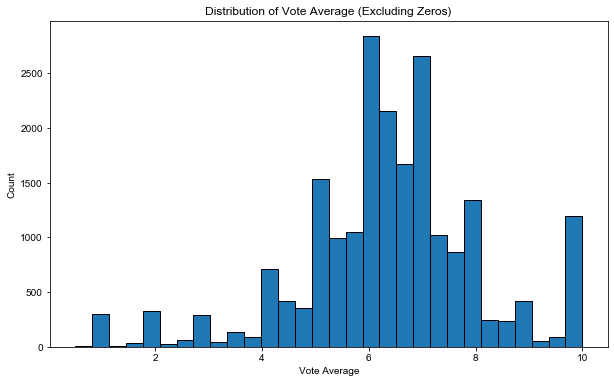

In [63]:
# Filter out rows where vote_average is 0
df_non_zero = df[df['vote_average'] != 0]

# Calculate the average vote
average_vote = df_non_zero['vote_average'].mean()
print("The average vote is:", average_vote)

average_vote = df_non_zero['vote_average'].median()
print("The median vote is:", average_vote)

# Create histogram for the distribution of vote_average without zeros
plt.figure(figsize=(10, 6))
plt.hist(df_non_zero['vote_average'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Vote Average (Excluding Zeros)')
plt.xlabel('Vote Average')
plt.ylabel('Count')

# Save the figure in high quality (300 dpi)
# plt.savefig("vote_average.png", format="png", dpi=300, bbox_inches='tight')
# plt.show()

plt.show()

In [43]:
df['production_companies']

0                              Pixar, Walt Disney Pictures
1                                                    Pixar
2                                                    Pixar
3                              Pixar, Walt Disney Pictures
4                              Pixar, Walt Disney Pictures
                               ...                        
51940                                                  NaN
51941    Benesse, Sony Music Direct, TOHO, The Answer S...
51942                                                  NaN
51943                                        Coronet Films
51944                             Studio Neum, Zagreb Film
Name: production_companies, Length: 51945, dtype: object

In [48]:
df['runtime'].max()

3720

In [ ]:
df['runtime'] 

In [49]:
df['runtime'].min()

0

In [52]:
runtime_counts = df['runtime'].value_counts()
print(runtime_counts.head(10))  # 

0     6301
7     4498
6     4208
3     3029
5     2998
4     2916
8     2459
2     2317
10    1968
1     1918
Name: runtime, dtype: int64


Movies left:
8062
The average runtime is: 82.90014884644009


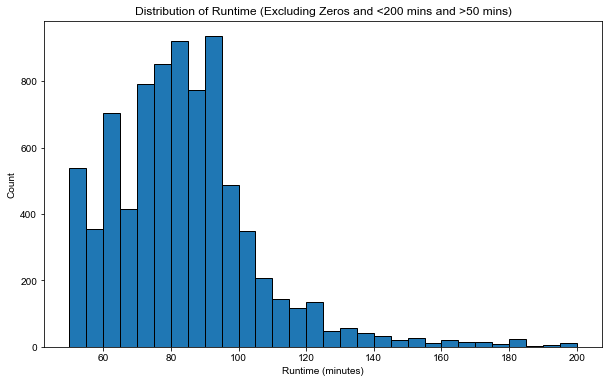

In [64]:
# Filter out rows 
df_filtered = df[(df['runtime'] != 0) & (df['runtime'] <= 200) & (df['runtime'] >= 50)]

print("Movies left:")
print(len(df_filtered))

average_runtime = df_filtered['runtime'].mean()
print("The average runtime is:", average_runtime)

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['runtime'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Runtime (Excluding Zeros and <200 mins and >50 mins)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')

# Save the figure in high quality (300 dpi)
# plt.savefig("runtime_distribution.png", format="png", dpi=300, bbox_inches='tight')
# plt.show()

plt.show()